<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/C%C3%B3pia_de_13_Regress%C3%A3o_Linear_V3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão de negocio

uma empresa esta interesada em verificar se a remuneração (salario) dos funcionarios esta de acordo com as politicas da empresa

para isso uma amostra de 46 colaboradores foi disponibilisada

* Pergunta de negocio: o salaraio muda de acordo com o ano de educação superior
* Se muda, é possivel prever o salario apartir de um modelo?

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [11]:
df_func = pd.read_csv('/content/base_funcionarios_v3.csv', delimiter=',', index_col='id')

df_func.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
id,,,,
0,5517.4,3,3,9.777079
1,6399.9,4,6,3.765998
2,6206.7,6,3,7.926264
3,6060.6,4,5,2.233497
4,6122.7,2,9,26.821842


In [12]:
df_func.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
 3   Tempo_de_Carreira   46 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.8 KB


In [13]:
df_func.describe().round(2)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
count,46.00,46.00,46.00,46.00
mean,6969.80,5.07,10.33,21.19
std,1924.87,2.84,7.60,15.87
min,4139.50,0.00,0.00,-3.24
25%,5818.35,4.00,5.25,9.62
50%,6394.75,5.00,8.50,17.69
75%,7972.40,6.00,17.25,29.77
max,12118.10,12.00,27.00,67.86


In [14]:
df_func.isna().sum()

,0
Salario,0
Anos_Educ_Superior,0
Tempo_Empresa,0
Tempo_de_Carreira,0


<Axes: xlabel='Tempo_de_Carreira', ylabel='Salario'>

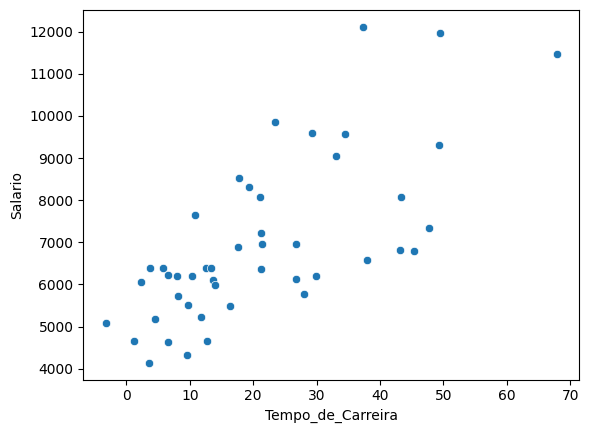

In [15]:
#grafico de dispersão
# eixo x explicativa
# eixo y resposta ou alvo (dependente)

sns.scatterplot(x=df_func['Tempo_de_Carreira'], y=df_func['Salario'])

In [16]:
#Correlação linear de pearson

df_func.corr()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
Salario,1.000000,0.776992,0.765173,0.708182
Anos_Educ_Superior,0.776992,1.000000,0.607486,0.612984
Tempo_Empresa,0.765173,0.607486,1.000000,0.938484
Tempo_de_Carreira,0.708182,0.612984,0.938484,1.000000


<Axes: >

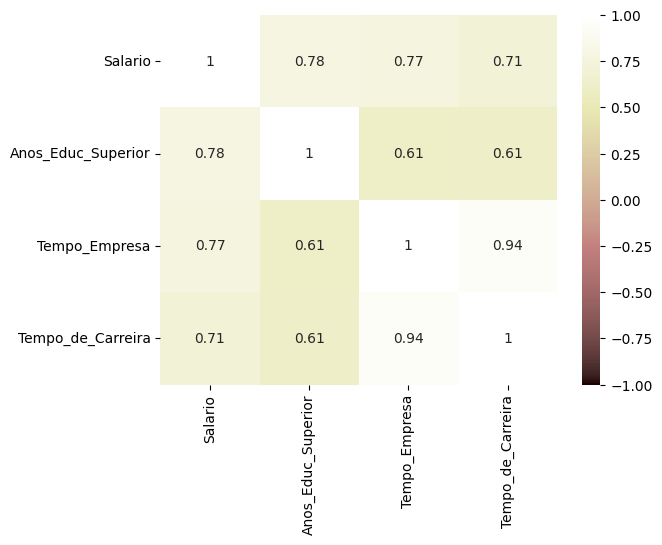

In [17]:
sns.heatmap(
    df_func.corr(),
    cmap='pink',
    vmin= -1,vmax= 1,
    annot=True
)

In [23]:
# ajuste do modelo

#variavel alvo

y = df_func['Salario']


#variavel explicativa
df_func['intercepto'] = 1
x=df_func[['intercepto','Anos_Educ_Superior','Tempo_Empresa','Tempo_de_Carreira']]

In [22]:
modelo = sm.OLS(y,x)

resultado = modelo.fit()

In [21]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     41.61
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           1.21e-12
Time:                        00:30:56   Log-Likelihood:                -380.92
No. Observations:                  46   AIC:                             769.8
Df Residuals:                      42   BIC:                             777.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4053.7618    308